In [6]:
import pandas as pd
import numpy as np
np.set_printoptions(precision=10, suppress=True)

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.regularizers import l2, l1
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Convolution1D
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [7]:
def miss_val_fixer(data):
    imp = SimpleImputer(missing_values=np.nan,strategy='mean',verbose=0)
    imp = imp.fit(data)
    fixed_data = imp.transform(data)
    return fixed_data

def standardize(train,valid):
    scaler = StandardScaler()
    std_train = scaler.fit_transform(train)
    std_valid = scaler.transform(valid)
    return std_train,std_valid


In [8]:
# dataset
dataset = pd.read_csv("SMRT_train.csv",nrows=60000,low_memory=False)
dataset = miss_val_fixer(dataset)
data = dataset[:,2:]
train_set, test_set = train_test_split(data, test_size=0.25, random_state=42)


train_X, test_X = standardize(train_set[:,:-1],test_set[:,:-1])
train_Y = train_set[:,-1]/10
test_Y = test_set[:,-1]/10

train_X = np.expand_dims(train_X, axis=1)
test_X = np.expand_dims(test_X, axis=1)

In [4]:
dataset.shape

(60000, 1579)

In [ ]:
model = tf.keras.models.Sequential([
#    layers.Conv1D(filters=64, kernel_size=8, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
#    layers.MaxPooling1D(padding='same'),
#    layers.Conv1D(filters=128, kernel_size=6, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
#    layers.MaxPooling1D(padding='same'),
#    layers.Conv1D(filters=256, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
#    layers.MaxPooling1D(padding='same'),
#    layers.Flatten(),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history_1 = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history_1 = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=16, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=16, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=16, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
##    layers.Dense(75  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history_1 = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
##    layers.Dense(75  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history_1 = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=8, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
##    layers.Dense(75  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=16, kernel_size=3, padding='same', kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=16, kernel_size=3, padding='same', kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
#    layers.Dense(75  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [ ]:
model = tf.keras.models.Sequential([
#    layers.Conv1D(filters=16, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l2(0.0001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=16, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.Conv1D(filters=8, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l2(0.0001)),
    layers.MaxPooling1D(padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])


In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

In [ ]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

In [ ]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [24]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPooling1D(pool_size=1),#padding='same'),
    layers.Conv1D(filters=16, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPooling1D(pool_size=1),#padding='same'),
    layers.Conv1D(filters=32, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.MaxPooling1D(pool_size=1),#padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
#    layers.Dense(500 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l2(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l2(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l2(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l2(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_15 (Conv1D)           (None, 1, 8)              50440     
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 1, 8)              0         
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 1, 16)             400       
_________________________________________________________________
max_pooling1d_16 (MaxPooling (None, 1, 16)             0         
_________________________________________________________________
conv1d_17 (Conv1D)           (None, 1, 32)             1568      
_________________________________________________________________
max_pooling1d_17 (MaxPooling (None, 1, 32)             0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 32)               

In [26]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 3s 2ms/step - loss: 1408.4625 - mae: 27.5062 - val_loss: 455.2719 - val_mae: 16.1484
Epoch 2/20
1286/1286 [==============================] - 2s 2ms/step - loss: 421.3835 - mae: 15.4396 - val_loss: 406.4910 - val_mae: 15.2501
Epoch 3/20
1286/1286 [==============================] - 2s 2ms/step - loss: 393.5063 - mae: 14.8629 - val_loss: 392.3942 - val_mae: 14.8982
Epoch 4/20
1286/1286 [==============================] - 2s 2ms/step - loss: 382.1549 - mae: 14.6243 - val_loss: 385.1501 - val_mae: 14.7767
Epoch 5/20
1286/1286 [==============================] - 2s 2ms/step - loss: 375.1367 - mae: 14.4764 - val_loss: 384.7438 - val_mae: 14.6842
Epoch 6/20
1286/1286 [==============================] - 2s 2ms/step - loss: 370.6349 - mae: 14.3674 - val_loss: 380.5046 - val_mae: 14.7057
Epoch 7/20
1286/1286 [==============================] - 2s 2ms/step - loss: 367.1219 - mae: 14.3094 - val_loss: 379.7030 - val_mae: 14.6574
Epoch 8/20
1286/128

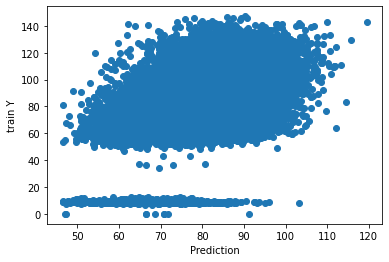

In [27]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

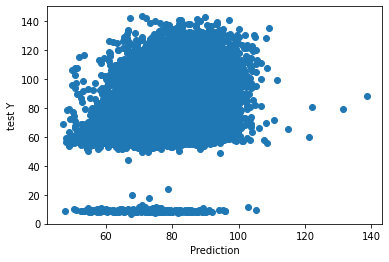

In [28]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [71]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=8, kernel_size=4, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),#padding='same'),
    layers.Conv1D(filters=16, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),#padding='same'),
    layers.Conv1D(filters=32, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),#padding='same'),
    layers.Flatten(),
#    layers.Dense(1000 , activation="relu",kernel_regularizer=l2(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(500 , activation="relu",kernel_regularizer=l1(0.0001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.0001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.0001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")])

In [75]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 5s 3ms/step - loss: 338.9272 - mae: 13.9191 - val_loss: 389.5329 - val_mae: 14.8816
Epoch 2/20
1286/1286 [==============================] - 4s 3ms/step - loss: 336.8462 - mae: 13.8753 - val_loss: 395.0723 - val_mae: 14.9548
Epoch 3/20
1286/1286 [==============================] - 4s 3ms/step - loss: 335.1342 - mae: 13.8453 - val_loss: 390.3499 - val_mae: 14.9328
Epoch 4/20
1286/1286 [==============================] - 4s 3ms/step - loss: 335.3544 - mae: 13.8400 - val_loss: 397.5270 - val_mae: 15.0726
Epoch 5/20
1286/1286 [==============================] - 4s 3ms/step - loss: 332.0773 - mae: 13.7921 - val_loss: 394.4623 - val_mae: 14.9709
Epoch 6/20
1286/1286 [==============================] - 4s 3ms/step - loss: 332.3001 - mae: 13.7930 - val_loss: 404.9775 - val_mae: 15.2812
Epoch 7/20
1286/1286 [==============================] - 4s 3ms/step - loss: 331.8267 - mae: 13.7828 - val_loss: 392.6045 - val_mae: 14.9290
Epoch 8/20
1286/1286

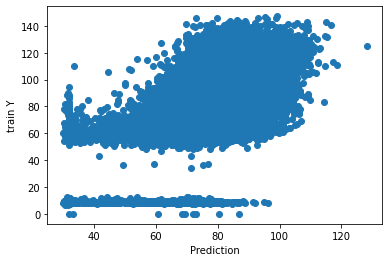

In [76]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

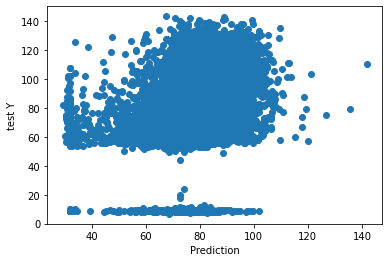

In [77]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()

In [167]:
model = tf.keras.models.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001),input_shape=(train_X.shape[1:])),
    layers.Conv1D(filters=64, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001)),#input_shape=(train_X.shape[1:])),
    layers.AvgPool1D(pool_size=1),
#    layers.Conv1D(filters=128, kernel_size=3, padding='same', activation="relu", kernel_regularizer=l1(0.001)),#input_shape=(train_X.shape[1:])),
#    layers.MaxPool1D(pool_size=1),
    layers.Flatten(),
    layers.Dense(500 , activation="relu",kernel_regularizer=l1(0.001)),#kernel_initializer="he_normal", input_shape=train_X.shape[1:]),
    layers.Dense(200 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=(8,32)),
    layers.Dense(100 , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(50  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(20  , activation="relu",kernel_regularizer=l1(0.001)),# kernel_initializer="he_normal",input_shape=train_X.shape[1:]),#
    layers.Dense(1)])#,kernel_initializer="he_normal")]

In [164]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss="mean_squared_error", optimizer=opt,metrics=['mae'])
history = model.fit(train_X,train_Y, validation_data=(test_X,test_Y),epochs=20,batch_size = 35, shuffle=True)

Epoch 1/20
1286/1286 [==============================] - 6s 4ms/step - loss: 843.3120 - mae: 20.2604 - val_loss: 417.8259 - val_mae: 15.1577
Epoch 2/20
1286/1286 [==============================] - 5s 4ms/step - loss: 396.2118 - mae: 14.7474 - val_loss: 400.1766 - val_mae: 14.9288
Epoch 3/20
1286/1286 [==============================] - 5s 4ms/step - loss: 380.2444 - mae: 14.4547 - val_loss: 397.4554 - val_mae: 14.8159
Epoch 4/20
1286/1286 [==============================] - 5s 4ms/step - loss: 368.0795 - mae: 14.2273 - val_loss: 400.0765 - val_mae: 14.8218
Epoch 5/20
1286/1286 [==============================] - 5s 4ms/step - loss: 360.6530 - mae: 14.0718 - val_loss: 401.7933 - val_mae: 14.8527
Epoch 6/20
1286/1286 [==============================] - 5s 4ms/step - loss: 354.1755 - mae: 13.9666 - val_loss: 399.0540 - val_mae: 15.0115
Epoch 7/20
1286/1286 [==============================] - 6s 5ms/step - loss: 346.8163 - mae: 13.8008 - val_loss: 395.0922 - val_mae: 14.8648
Epoch 8/20
1286/1286

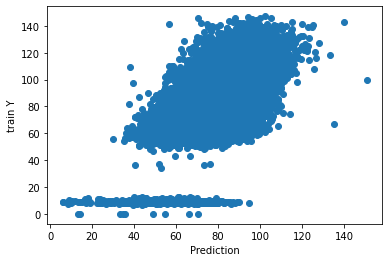

In [165]:
plt.scatter(model.predict(train_X),train_Y)
plt.xlabel("Prediction")
plt.ylabel("train Y")
plt.show()

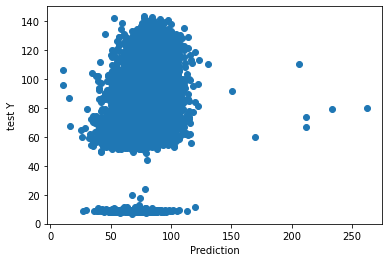

In [166]:
plt.scatter(model.predict(test_X),test_Y)
plt.xlabel("Prediction")
plt.ylabel("test Y")
plt.show()